In [183]:
import pandas as pd
import numpy as np
from typing import Union, List, Tuple, Optional
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.ticker as mticker
from pypalettes import load_cmap
from highlight_text import ax_text
from drawarrow import ax_arrow
from cycler import cycler
pd.options.display.float_format = '{:,.2f}'.format

# Optimizing Memory Use

In [184]:
# sal = pd.read_csv("../data/salary2.csv")

# sal.info()

# df = sal
# df.info(memory_usage='deep')
# df["Department"] = df["Department"].astype("category")
# df["jobTitle"] = df["jobTitle"].astype("category")
# df["Employee_Name"] = df["Employee_Name"].astype("string")
# df.info(memory_usage='deep')

# optimized_dtypes = {
#     "CalYear": "int16",
#     "Employee_Name": "string",
#     "Department": "category",
#     "jobTitle": "category",
#     "Annual_Rate": "float32",
#     "Regular_Rate": "float32",
#     "Overtime_Rate": "float32",
#     "Incentive_Allowance": "float32",
#     "Other": "float32",
#     "YTD_Total": "float32",
#     "ObjectId": "int32"
# }
# df = df.astype(optimized_dtypes)


In [185]:
optimized_dtypes = {
    "CalYear": "int16",
    "Employee_Name": "string",
    "Department": "category",
    "jobTitle": "category",
    "Annual_Rate": "float32",
    "Regular_Rate": "float32",
    "Overtime_Rate": "float32",
    "Incentive_Allowance": "float32",
    "Other": "float32",
    "YTD_Total": "float32",
    "ObjectId": "int32"
}

sal = pd.read_csv("../data/salary2.csv", dtype=optimized_dtypes)


In [186]:
sal.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId
0,2021,<NA>,Belle of Louisville,Hospitality Worker,"3,120.00",687.00,0.00,0.00,NaN,687.00,1
1,2021,<NA>,Parks & Recreation,Park Aide,"31,200.00",600.00,0.00,0.00,NaN,600.00,2
2,2021,"Martin, David",Library,Library Page L/U,"28,433.60","28,412.56",0.00,"1,450.00",NaN,"30,862.81",3
3,2021,"Bratcher, Elaine",Louisville Metro Police,Clerk Typist II-Police,"35,256.00","35,256.01",0.00,"1,563.12",NaN,"36,819.13",4
4,2021,"Jackson, Nila",Louisville Metro Police,Traffic Guard II,"21,418.80","16,529.14",952.39,"1,000.00",NaN,"18,481.53",5


In [187]:
sal["Other"].value_counts()

Series([], Name: count, dtype: int64)

## Cleaning

In [188]:
sal = sal.fillna({
    "Employee_Name": "Unknown",
    "Other": 0
})

sal = sal.drop("Other", axis=1)
sal.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,YTD_Total,ObjectId
0,2021,Unknown,Belle of Louisville,Hospitality Worker,"3,120.00",687.00,0.00,0.00,687.00,1
1,2021,Unknown,Parks & Recreation,Park Aide,"31,200.00",600.00,0.00,0.00,600.00,2
2,2021,"Martin, David",Library,Library Page L/U,"28,433.60","28,412.56",0.00,"1,450.00","30,862.81",3
3,2021,"Bratcher, Elaine",Louisville Metro Police,Clerk Typist II-Police,"35,256.00","35,256.01",0.00,"1,563.12","36,819.13",4
4,2021,"Jackson, Nila",Louisville Metro Police,Traffic Guard II,"21,418.80","16,529.14",952.39,"1,000.00","18,481.53",5


In [189]:
# # hr rate and converts to min wage if less than 7.25
# sal["Hr_Rate"] = sal["Annual_Rate"] / 2080 
# sal["Hr_Rate"] = sal["Hr_Rate"].mask(sal["Hr_Rate"] < 7.25, 7.25)

# # cal Overtime rate 
# sal["Ot_Rate"] = sal["Hr_Rate"] * 1.5 

# # finding and filtering out part time employees
# sal['Reg_Hours'] = sal["Annual_Rate"] / sal["Hr_Rate"]
# sal = sal[sal['Reg_Hours'] >= 2080]

# # calculating regular hours
# sal['Rg_Hours'] = sal["Regular_Rate"] / sal["Hr_Rate"] 

# # calculating overtime hours
# sal['Ot_Hours'] = sal["Overtime_Rate"] / sal["Ot_Rate"] 

# sal['Total_Hours'] = sal['Reg_Hours'] + sal['Ot_Hours']

# sal["Weeks_Worked"] = sal["Regular_Rate"] / (sal["Hr_Rate"] * 40) 

# sal["Reg_Hrs_per_Week"] = sal["Regular_Rate"] / (sal["Hr_Rate"] * sal["Weeks_Worked"])

# sal["Ot_Hrs_per_Week"] = sal["Overtime_Rate"] / (sal["Ot_Rate"] * sal["Weeks_Worked"])

# sal["Avg_Hrs_per_Week"] = sal["Reg_Hrs_per_Week"] + sal["Ot_Hrs_per_Week"]

# sal.head(10)

<style>
div.math { text-align: left !important; }
</style>
# Employee Pay and Hours Calculations

This section documents the formulas used to calculate hourly pay rates, overtime, total hours, and weekly averages for full-time employees.

---

### 1️ Hourly Rate and Minimum Wage Adjustment

Hourly rate assumes 2,080 hours per year (40 hours × 52 weeks):

$$
Hr\_Rate = \frac{Annual\_Rate}{2080}
$$

If the calculated hourly rate is below \$7.25 (U.S. federal minimum wage), it’s adjusted upward:

$$
Hr\_Rate =
\begin{cases}
7.25, & Hr\_Rate < 7.25 \\
Hr\_Rate, & \text{otherwise}
\end{cases}
$$

---

### 2️ Overtime Rate

Overtime is paid at 1.5× the regular hourly rate:

$$
Ot\_Rate = 1.5 \times Hr\_Rate
$$

---

### 3️ Regular Hours and Full-Time Filter

Estimate total regular annual hours:

$$
Reg\_Hours = \frac{Annual\_Rate}{Hr\_Rate}
$$

Filter to include only full-time employees:

$$
Reg\_Hours \ge 2080
$$

---

### 4️ Regular and Overtime Hours Worked

Compute regular and overtime hours based on pay:

$$
Rg\_Hours = \frac{Regular\_Rate}{Hr\_Rate}
$$

$$
Ot\_Hours = \frac{Overtime\_Rate}{Ot\_Rate}
$$

---

### 5️ Total Hours Worked

$$
Total\_Hours = Reg\_Hours + Ot\_Hours
$$

---

### 6️ Weeks Worked

Estimate number of weeks worked:

$$
Weeks\_Worked = \frac{Regular\_Rate}{Hr\_Rate \times 40}
$$

---

### 7️ Weekly Breakdown of Regular and Overtime Hours

$$
Reg\_Hrs\_per\_Week = \frac{Regular\_Rate}{Hr\_Rate \times Weeks\_Worked}
$$

$$
Ot\_Hrs\_per\_Week = \frac{Overtime\_Rate}{Ot\_Rate \times Weeks\_Worked}
$$

---

### 8️ Average Hours per Week

$$
Avg\_Hrs\_per\_Week = Reg\_Hrs\_per\_Week + Ot\_Hrs\_per\_Week
$$




In [190]:
# 1️ Calculate Hourly Rate and apply minimum wage rule
sal["Hr_Rate"] = sal["Annual_Rate"] / 2080 

# If hourly rate is less than $7.25, replace it with $7.25 (minimum wage floor)
sal["Hr_Rate"] = sal["Hr_Rate"].mask(sal["Hr_Rate"] < 7.25, 7.25)

# 2 Calculate Overtime Rate
sal["Ot_Rate"] = sal["Hr_Rate"] * 1.5

# 3️ Filter out part-time employees
sal['Reg_Hours'] = sal["Annual_Rate"] / sal["Hr_Rate"]

# Keep only full-time employees (≥ 2080 hours)
sal = sal[sal['Reg_Hours'] >= 2080]

# 4️ Calculate regular hours worked (based on Regular_Rate)
sal['Rg_Hours'] = sal["Regular_Rate"] / sal["Hr_Rate"]

# 5️ Calculate overtime hours worked
sal['Ot_Hours'] = sal["Overtime_Rate"] / sal["Ot_Rate"]

# 6️ Total hours worked
sal['Total_Hours'] = sal['Reg_Hours'] + sal['Ot_Hours']

# 7️ Estimate number of weeks worked
sal["Weeks_Worked"] = sal["Regular_Rate"] / (sal["Hr_Rate"] * 40) 

# 8️ Regular hours per week
sal["Reg_Hrs_per_Week"] = sal["Regular_Rate"] / (sal["Hr_Rate"] * sal["Weeks_Worked"])

# 9️ Overtime hours per week
sal["Ot_Hrs_per_Week"] = sal["Overtime_Rate"] / (sal["Ot_Rate"] * sal["Weeks_Worked"])

# 10 Average hours per week
sal["Avg_Hrs_per_Week"] = sal["Reg_Hrs_per_Week"] + sal["Ot_Hrs_per_Week"]

sal.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Reg_Hours,Rg_Hours,Ot_Hours,Total_Hours,Weeks_Worked,Reg_Hrs_per_Week,Ot_Hrs_per_Week,Avg_Hrs_per_Week
1,2021,Unknown,Parks & Recreation,Park Aide,"31,200.00",600.00,0.00,0.00,600.00,2,15.00,22.50,"2,080.00",40.00,0.00,"2,080.00",1.00,40.00,0.00,40.00
2,2021,"Martin, David",Library,Library Page L/U,"28,433.60","28,412.56",0.00,"1,450.00","30,862.81",3,13.67,20.51,"2,080.00","2,078.46",0.00,"2,080.00",51.96,40.00,0.00,40.00
3,2021,"Bratcher, Elaine",Louisville Metro Police,Clerk Typist II-Police,"35,256.00","35,256.01",0.00,"1,563.12","36,819.13",4,16.95,25.43,"2,080.00","2,080.00",0.00,"2,080.00",52.00,40.00,0.00,40.00
4,2021,"Jackson, Nila",Louisville Metro Police,Traffic Guard II,"21,418.80","16,529.14",952.39,"1,000.00","18,481.53",5,10.30,15.45,"2,080.00","1,605.16",61.66,"2,141.66",40.13,40.00,1.54,41.54
5,2021,"Ammon, Darrell",Louisville Metro Police,Criminal Justice Specialist,"50,107.20","49,362.47",0.00,0.00,"49,362.47",6,24.09,36.14,"2,080.00","2,049.09",0.00,"2,080.00",51.23,40.00,0.00,40.00


In [191]:
sal = sal.sort_values(by="Avg_Hrs_per_Week", ascending=False)
sal.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Reg_Hours,Rg_Hours,Ot_Hours,Total_Hours,Weeks_Worked,Reg_Hrs_per_Week,Ot_Hrs_per_Week,Avg_Hrs_per_Week
9328,2025,"Leonard, Dillon Michael",Louisville Fire,Firefighter 56hr,"63,441.66",12.04,51.01,0.00,63.05,9329,30.50,45.75,"2,080.00",0.39,1.11,"2,081.11",0.01,40.00,112.98,152.98
35070,2024,"Scharrer, Justin",Emergency Management Services,EMT,"60,424.00","5,513.59","18,510.80",0.00,"33,640.39",35071,29.05,43.57,"2,080.00",189.80,424.80,"2,504.80",4.74,40.00,89.53,129.53
27246,2023,"Murphy, Paul P.",Louisville Fire,Fire Apparatus Operator 56hr,"72,077.82","40,383.16","97,922.36","39,150.60","177,456.12",27247,34.65,51.98,"2,080.00","1,165.37","1,883.88","3,963.88",29.13,40.00,64.66,104.66
38660,2024,"McKeehan, Matthew Douglas",Emergency Management Services,EMT,"45,926.40","13,663.62","31,838.34",350.00,"45,851.96",38661,22.08,33.12,"2,080.00",618.82,961.30,"3,041.30",15.47,40.00,62.14,102.14
29109,2023,"Herndon, Adam B",Louisville Fire,Fire Company Commander 56hr,"82,278.14","42,926.26","94,210.22","29,398.80","167,021.05",29110,39.56,59.34,"2,080.00","1,085.18","1,587.76","3,667.76",27.13,40.00,58.53,98.53


In [192]:
sal['Reg_Hours'].value_counts()

Reg_Hours
2,080.00    39282
Name: count, dtype: int64

In [193]:
def year_selector(
    df: pd.DataFrame,
    year: Union[int, List[int], Tuple[int, int]]
) -> pd.DataFrame:
    """
    Filter a DataFrame by one or more calendar years.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame containing a 'CalYear' column.
    year : int | list[int] | tuple[int, int]
        The year or years to filter by.
        - If int: returns rows for that year only.
        - If list of ints: returns rows matching any year in the list.
        - If tuple of (start, end): returns rows within that inclusive range.

    Returns
    -------
    pd.DataFrame
        A filtered DataFrame containing only rows that match the given year(s).

    Examples
    --------
    >>> year_selector(sal, 2021)
    # Returns rows where CalYear == 2021

    >>> year_selector(sal, [2020, 2021])
    # Returns rows where CalYear is either 2020 or 2021

    >>> year_selector(sal, (2019, 2021))
    # Returns rows where CalYear is between 2019 and 2021 inclusive
    """
    if isinstance(year, int):
        return df[df["CalYear"] == year]
    elif isinstance(year, list):
        return df[df["CalYear"].isin(year)]
    elif isinstance(year, tuple) and len(year) == 2:
        start, end = year
        return df[(df["CalYear"] >= start) & (df["CalYear"] <= end)]
    else:
        raise TypeError("`year` must be an int, list of ints, or tuple of (start, end).")
    return df

In [194]:
sal_2025 = year_selector(sal, 2025)
sal_2025

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Reg_Hours,Rg_Hours,Ot_Hours,Total_Hours,Weeks_Worked,Reg_Hrs_per_Week,Ot_Hrs_per_Week,Avg_Hrs_per_Week
9328,2025,"Leonard, Dillon Michael",Louisville Fire,Firefighter 56hr,"63,441.66",12.04,51.01,0.00,63.05,9329,30.50,45.75,"2,080.00",0.39,1.11,"2,081.11",0.01,40.00,112.98,152.98
7293,2025,"Fenwick, Paul E",Louisville Metro Police Department,Police Officer,"95,555.20","75,315.67","134,672.06","10,093.88","220,081.61",7294,45.94,68.91,"2,080.00","1,639.44","1,954.32","4,034.32",40.99,40.00,47.68,87.68
7810,2025,"Standard, Royce Leshawn",Department of Corrections,Corrections Officer,"69,596.80","55,491.41","95,985.71",0.00,"151,477.12",7811,33.46,50.19,"2,080.00","1,658.44","1,912.45","3,992.45",41.46,40.00,46.13,86.13
8618,2025,"Stimphil, Richardson",Department of Corrections,Corrections Officer,"66,331.20","50,618.52","86,647.31",0.00,"137,265.83",8619,31.89,47.84,"2,080.00","1,587.28","1,811.38","3,891.38",39.68,40.00,45.65,85.65
13223,2025,"Mann, Mikayla Faith",Emergency Management Services,EMS EMT-Paramedic I,"62,046.40","3,740.70","6,106.35",0.00,"9,847.05",13224,29.83,44.74,"2,080.00",125.40,136.47,"2,216.47",3.14,40.00,43.53,83.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,2025,"Cole, Misty",Records Compliance,Open Records Supervisor,"59,217.60",0.00,0.00,0.00,0.00,13576,28.47,42.71,"2,080.00",0.00,0.00,"2,080.00",0.00,NaN,NaN,NaN
13591,2025,"Raines, Clinton Lee",Emergency Management Services,EMT,"45,011.20",0.00,0.00,0.00,0.00,13592,21.64,32.46,"2,080.00",0.00,0.00,"2,080.00",0.00,NaN,NaN,NaN
13681,2025,"Washington, Kingston",Parks & Recreation,Parks & Rec. Aide,"34,632.00",0.00,0.00,0.00,0.00,13682,16.65,24.97,"2,080.00",0.00,0.00,"2,080.00",0.00,NaN,NaN,NaN
13757,2025,"Wescott, Brenda",Louisville Metro Police Department,Police Officer,"63,585.60",0.00,0.00,0.00,0.00,13758,30.57,45.86,"2,080.00",0.00,0.00,"2,080.00",0.00,NaN,NaN,NaN


In [195]:
def department_filter(
    df: pd.DataFrame,
    department: Union[str, List[str]]
) -> pd.DataFrame:
    """
    Filter a DataFrame by one or more department names.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame containing a 'Department' column.
    department : str | list[str]
        Department name(s) to filter by.
        - If str: returns rows for that department only.
        - If list of str: returns rows matching any department in the list.

    Returns
    -------
    pd.DataFrame
        A filtered DataFrame containing only rows for the given department(s).

    Examples
    --------
    >>> department_filter(sal, "Louisville Metro Police Department")
    # Returns rows for that department

    >>> department_filter(sal, ["Parks & Recreation", "Library"])
    # Returns rows for both departments
    """
    # Clean column names once to avoid hidden tab or whitespace issues
    df.columns = df.columns.str.strip()

    if isinstance(department, str):
        return df[df["Department"] == department]
    elif isinstance(department, list):
        return df[df["Department"].isin(department)]
    else:
        raise TypeError("`department` must be a string or list of strings.")


In [196]:
lmpd25 = department_filter(sal_2025,"Louisville Metro Police Department")
lmpd25.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Reg_Hours,Rg_Hours,Ot_Hours,Total_Hours,Weeks_Worked,Reg_Hrs_per_Week,Ot_Hrs_per_Week,Avg_Hrs_per_Week
7293,2025,"Fenwick, Paul E",Louisville Metro Police Department,Police Officer,"95,555.20","75,315.67","134,672.06","10,093.88","220,081.61",7294,45.94,68.91,"2,080.00","1,639.44","1,954.32","4,034.32",40.99,40.00,47.68,87.68
11250,2025,"Richardson, Joshua Thomas",Louisville Metro Police Department,Police Officer,"78,790.40","58,987.21","76,854.67","8,280.70","144,122.58",11251,37.88,56.82,"2,080.00","1,557.21","1,352.60","3,432.60",38.93,40.00,34.74,74.74
9911,2025,"Aviles, Celestino Ardres Ortiz",Louisville Metro Police Department,Police Officer,"80,246.40","63,823.73","82,673.52","8,323.57","154,820.81",9912,38.58,57.87,"2,080.00","1,654.32","1,428.61","3,508.61",41.36,40.00,34.54,74.54
7973,2025,"Williams, Derrick D",Louisville Metro Police Department,Police Officer,"90,584.00","71,934.12","87,857.76","7,954.99","167,746.88",7974,43.55,65.32,"2,080.00","1,651.76","1,344.93","3,424.93",41.29,40.00,32.57,72.57
7283,2025,"Cadwell, Corey R",Louisville Metro Police Department,Police Sergeant,"111,550.40","89,179.76","100,464.80","7,711.35","197,355.91",7284,53.63,80.44,"2,080.00","1,662.87","1,248.86","3,328.86",41.57,40.00,30.04,70.04


# Plot Style 

In [197]:
# Define your custom colors
colors = ['#FEBE10', '#1D1E9E', '#AD0000', '#000000', '#FFFFFF']

plt.rcParams.update({
    # Colors
    'axes.prop_cycle': cycler('color', colors),

    # Background
    'figure.facecolor': 'lightgrey',
    'axes.facecolor': 'lightgrey',
    'savefig.facecolor': 'lightgrey',

    # Grid
    'axes.grid': True,
    'grid.color': '#000000',
    'grid.alpha': 0.1,
    'grid.linestyle': '--',

    # Lines & markers
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'lines.markeredgewidth': 0.5,

    # Axes & ticks
    'axes.edgecolor': '#000000',
    'axes.labelcolor': '#000000',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,

    # Legend
    'legend.frameon': False,
    'legend.fontsize': 10,
    'legend.loc': 'best',

    # Font
    'font.family': 'DejaVu Sans',
    'text.color': '#000000',

    # Savefig
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
})

In [198]:
# Create the formatter once
formatter = mticker.StrMethodFormatter("{x:,.0f}")

def apply_formatter(ax=None):
    """Automatically format numeric axes with commas, leave text/categorical axes alone."""
    if ax is None:
        ax = plt.gca()
    
    # Format x-axis only if tick labels are numbers
    x_labels = [lbl.get_text() for lbl in ax.get_xticklabels()]
    if all(_is_number(lbl) for lbl in x_labels):
        ax.xaxis.set_major_formatter(formatter)
    
    # Format y-axis only if tick labels are numbers
    y_labels = [lbl.get_text() for lbl in ax.get_yticklabels()]
    if all(_is_number(lbl) for lbl in y_labels):
        ax.yaxis.set_major_formatter(formatter)

def _is_number(s):
    """Helper to check if string can be converted to float."""
    try:
        float(s.replace(',', ''))  # remove commas if already formatted
        return True
    except ValueError:
        return False

In [199]:
lmpd25.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Reg_Hours,Rg_Hours,Ot_Hours,Total_Hours,Weeks_Worked,Reg_Hrs_per_Week,Ot_Hrs_per_Week,Avg_Hrs_per_Week
7293,2025,"Fenwick, Paul E",Louisville Metro Police Department,Police Officer,"95,555.20","75,315.67","134,672.06","10,093.88","220,081.61",7294,45.94,68.91,"2,080.00","1,639.44","1,954.32","4,034.32",40.99,40.00,47.68,87.68
11250,2025,"Richardson, Joshua Thomas",Louisville Metro Police Department,Police Officer,"78,790.40","58,987.21","76,854.67","8,280.70","144,122.58",11251,37.88,56.82,"2,080.00","1,557.21","1,352.60","3,432.60",38.93,40.00,34.74,74.74
9911,2025,"Aviles, Celestino Ardres Ortiz",Louisville Metro Police Department,Police Officer,"80,246.40","63,823.73","82,673.52","8,323.57","154,820.81",9912,38.58,57.87,"2,080.00","1,654.32","1,428.61","3,508.61",41.36,40.00,34.54,74.54
7973,2025,"Williams, Derrick D",Louisville Metro Police Department,Police Officer,"90,584.00","71,934.12","87,857.76","7,954.99","167,746.88",7974,43.55,65.32,"2,080.00","1,651.76","1,344.93","3,424.93",41.29,40.00,32.57,72.57
7283,2025,"Cadwell, Corey R",Louisville Metro Police Department,Police Sergeant,"111,550.40","89,179.76","100,464.80","7,711.35","197,355.91",7284,53.63,80.44,"2,080.00","1,662.87","1,248.86","3,328.86",41.57,40.00,30.04,70.04


In [200]:
lmpd25 = lmpd25.head(20)

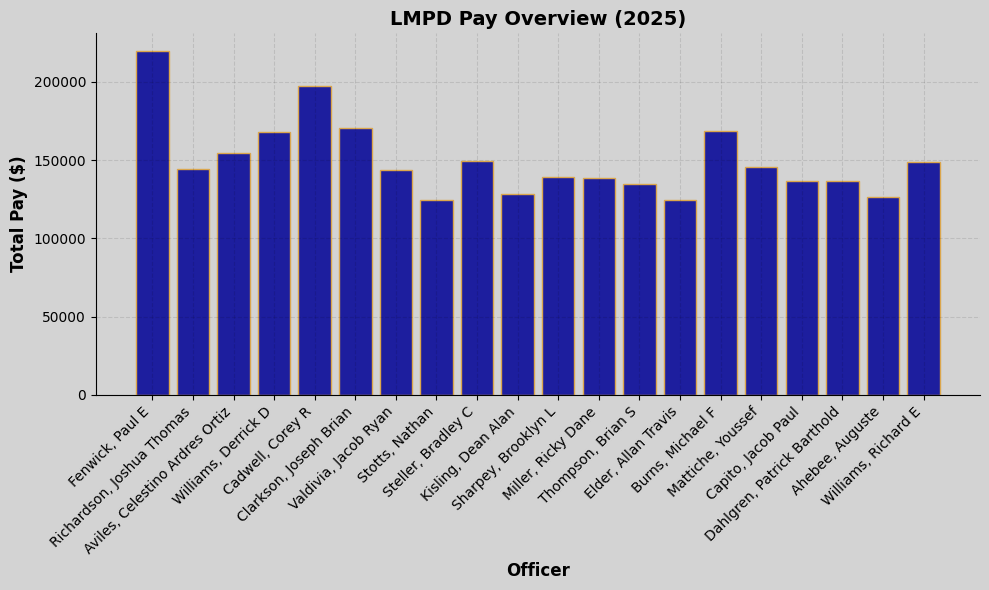

In [201]:
# Bar plot of officer vs pay
plt.figure(figsize=(10, 6))
plt.bar(lmpd25["Employee_Name"], lmpd25["YTD_Total"], color="#1D1E9E", edgecolor="#DBA64C")

plt.xlabel("Officer", fontsize=12, weight='bold')
plt.ylabel("Total Pay ($)", fontsize=12, weight='bold')
plt.title("LMPD Pay Overview (2025)", fontsize=14, weight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

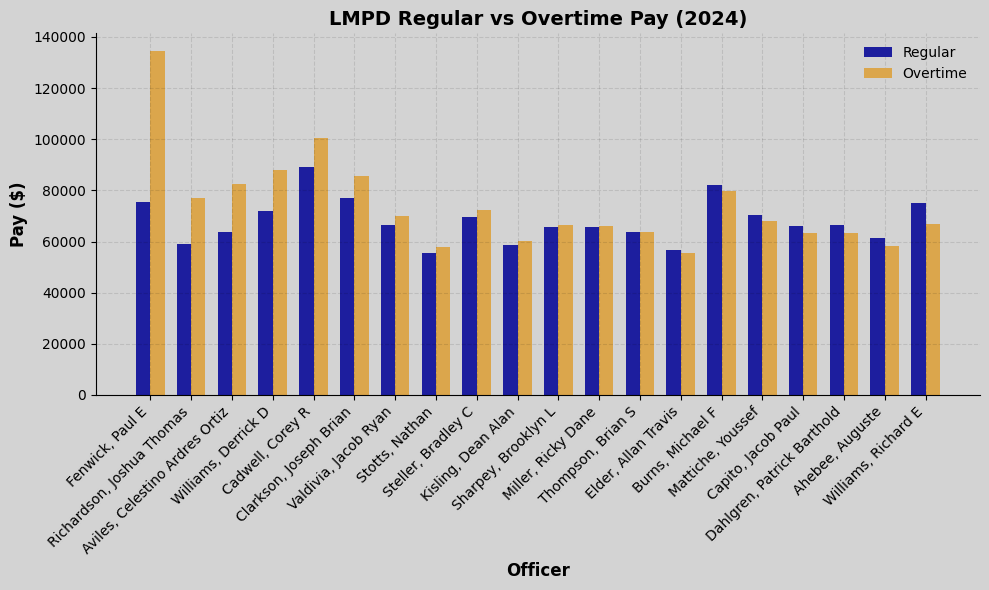

In [202]:
x = np.arange(len(lmpd25))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, lmpd25["Regular_Rate"], width, label="Regular", color="#1D1E9E")
ax.bar(x + width/2, lmpd25["Overtime_Rate"], width, label="Overtime", color="#DBA64C")

ax.set_xticks(x)
ax.set_xticklabels(lmpd25["Employee_Name"], rotation=45, ha="right")
ax.set_xlabel("Officer", fontsize=12, weight='bold')
ax.set_ylabel("Pay ($)", fontsize=12, weight='bold')
ax.set_title("LMPD Regular vs Overtime Pay (2024)", fontsize=14, weight='bold')
ax.legend()
plt.tight_layout()
plt.show()

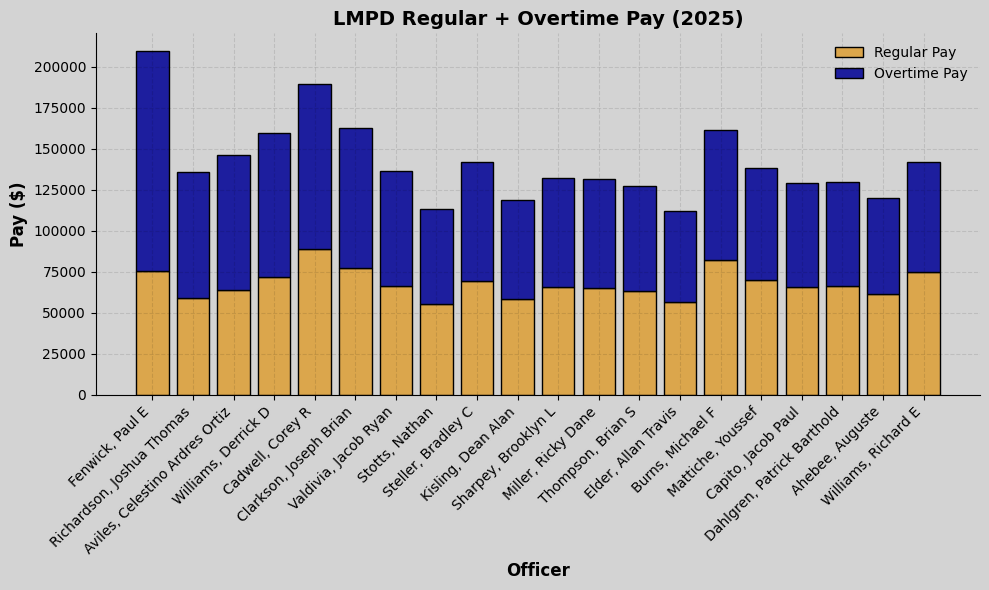

In [203]:
# Stacked bar plot of Regular + Overtime pay
plt.figure(figsize=(10, 6))

# Bottom: Regular pay (yellow)
plt.bar(
    lmpd25["Employee_Name"],
    lmpd25["Regular_Rate"],
    color="#DBA64C",
    edgecolor="#000000",
    label="Regular Pay"
)

# Top: Overtime pay (blue), stacked on top of Regular pay
plt.bar(
    lmpd25["Employee_Name"],
    lmpd25["Overtime_Rate"],
    bottom=lmpd25["Regular_Rate"],
    color="#1D1E9E",
    edgecolor="#000000",
    label="Overtime Pay"
)

# Labels and title
plt.xlabel("Officer", fontsize=12, weight='bold')
plt.ylabel("Pay ($)", fontsize=12, weight='bold')
plt.title("LMPD Regular + Overtime Pay (2025)", fontsize=14, weight='bold')

# Rotate names and tidy layout
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


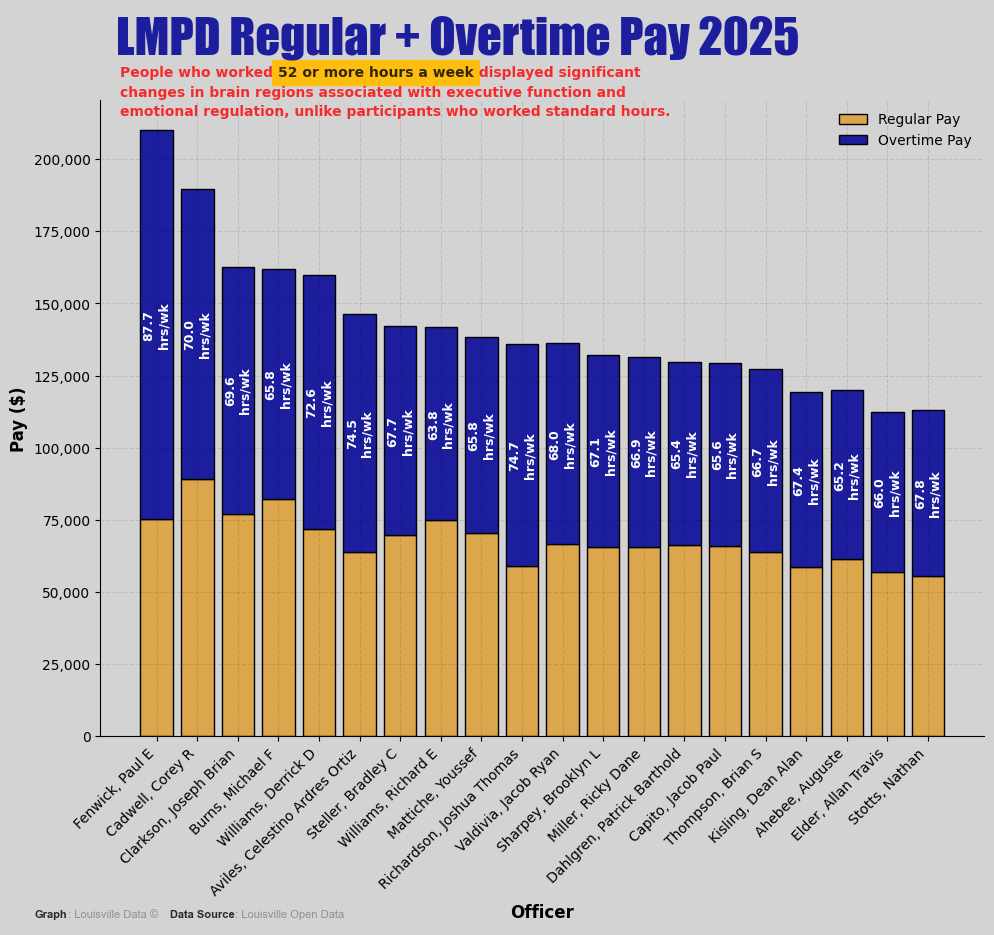

In [204]:
lmpd25 = lmpd25.sort_values(by="YTD_Total", ascending=False)
plt.figure(figsize=(10, 10))

# Regular pay (bottom - gold)
plt.bar(
    lmpd25["Employee_Name"],
    lmpd25["Regular_Rate"],
    color="#DBA64C",
    edgecolor="#000000",
    label="Regular Pay"
)

# Overtime pay (top - blue)
plt.bar(
    lmpd25["Employee_Name"],
    lmpd25["Overtime_Rate"],
    bottom=lmpd25["Regular_Rate"],
    color="#1D1E9E",
    edgecolor="#000000",
    label="Overtime Pay"
)

# Add Avg_Hrs_per_Week label inside the blue section (vertical + white)
for i, (reg, ot, avg_hrs) in enumerate(zip(
    lmpd25["Regular_Rate"],
    lmpd25["Overtime_Rate"],
    lmpd25["Avg_Hrs_per_Week"]
)):
    if ot > 0:  # only show label if there's overtime to display
        y_position = reg + (ot / 2)  # halfway up the blue bar
        plt.text(
            i, y_position,
            f"{avg_hrs:.1f}\nhrs/wk",
            ha='center', va='center',
            rotation=90,
            fontsize=9, fontweight='bold',
            color="#FFFFFF"
        )
    else:  # if no overtime, place in upper part of regular bar
        y_position = reg * 0.9
        plt.text(
            i, y_position,
            f"{avg_hrs:.1f}\nhrs/wk",
            ha='center', va='top',
            rotation=90,
            fontsize=9, fontweight='bold',
            color="#1D1E9E"  # dark blue for contrast on gold
        )

# Labels and title
plt.xlabel("Officer", fontsize=12, weight='bold')
plt.ylabel("Pay ($)", fontsize=12, weight='bold')
# plt.title("LMPD Regular + Overtime Pay (2025)", fontsize=14, weight='bold')

# Caption
s = "<Graph>: Louisville Data ©    <Data Source>: Louisville Open Data"
ax_text(
    x=-3,
    y=-60000,
    s=s,
    fontfamily='Arial',
    size=8,
    color='grey',
    ha="left",
    alpha=0.8,
    highlight_textprops=[
        {"weight": "bold", "color": "black"},
        {"weight": "bold", "color": "black"}
    ]
)


# subtitle
s = (
    "People who worked {52 or more hours a week} displayed significant\n"
    "changes in brain regions associated with executive function and\n"
    "emotional regulation, unlike participants who worked standard hours."
)

ax_text(
    x=-0.9, y=232500, s=s,
    fontfamily='sans-serif', size=10, ha="left",
    color="#FF0000", alpha=0.8,
     weight='bold',
    highlight_textprops=[{"color": "#000000", "backgroundcolor": "#FEBE10"}],  # black on yellow
    delim=("{", "}")  # highlight span markers, but they won’t appear in output
)

# Title (added space for larger figure)
s = "LMPD Regular + Overtime Pay 2025"
ax_text(x=-1, y=250000, s=s, fontfamily='impact', size=35, ha="left", weight='bold', color='#1D1E9E')

# Rotate names, show legend, and tidy layout
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
apply_formatter()
plt.show()
